In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
#import janitor
import datetime

In [3]:
from nltk.corpus import stopwords
from textblob import TextBlob

import string

import itertools
import collections
import nltk

In [13]:
df = pd.read_excel('final_WSJ_News.xlsx')
df

,headline,subheading,timestamp,content
0,Carbon-Transformation Startup LanzaTech is Goi...,"Company traps waste gas, uses bacteria to turn...","March 8, 2022 7:00 am ET",LanzaTech CEO Jennifer Holmgren said cash from...
1,Intel Files to Take Self-Driving Unit Mobileye...,Some estimates put the unit’s projected valuat...,"March 7, 2022 11:12 am ET",Intel bought Mobileye in 2017 for around $15 b...
2,Grab’s Stock Plunge Shows the Perils of SPAC M...,Company is latest in a string of SPAC deals th...,"Updated March 4, 2022 10:00 am ET",A Grab motorcycle rider seen making delivery i...
3,SPAC Startups Made Lofty Promises. They Aren’t...,Hot upstarts that went public via blank-check ...,"Updated Feb. 25, 2022 5:02 pm ET",Eight months after Arrival SA went public via ...
4,Stocks End Higher After New Russian Sanctions ...,Major indexes recover after invasion of Ukrain...,"Updated Feb. 24, 2022 6:13 pm ET",Index performance\nSource: FactSet\nCreated wi...
...,...,...,...,...
349,Credit Suisse Faces Banker Talent Drain After ...,At least 10 managing directors have said they ...,"Updated May 17, 2021 6:26 pm ET",Credit Suisse’s headquarters in Zurich. The ba...
350,Bright Machines Going Public in $1.6 Billion S...,Manufacturing-software company joins 3D-printi...,"Updated May 17, 2021 11:04 am ET",A 2019 version of a Bright Machines microfacto...
351,Indonesia’s Top Tech Startups Gojek and Tokope...,The group plans to go public and is targeting ...,"May 17, 2021 4:57 am ET",Gojek has expanded to offer on-demand services...
352,What’s News: Business & Finance,NaN,"May 17, 2021","May 17, 2021\nSAVE\nPRINT\nTEXT\nAT&T is in ad..."


We see some summary posts with headline of "'What’s News: Business & Finance." We remove them due to different format and repetition of contents.

In [14]:
df=df[df['headline'] != 'What’s News: Business & Finance']
print(len(df))
df.tail()

342


,headline,subheading,timestamp,content
348,GoTo vs. Grab: Clash of the $40 Billion Superapps,Another big deal shows that Southeast Asia is ...,"Updated May 18, 2021 6:10 am ET",Indonesian startups Gojek and Tokopedia are pl...
349,Credit Suisse Faces Banker Talent Drain After ...,At least 10 managing directors have said they ...,"Updated May 17, 2021 6:26 pm ET",Credit Suisse’s headquarters in Zurich. The ba...
350,Bright Machines Going Public in $1.6 Billion S...,Manufacturing-software company joins 3D-printi...,"Updated May 17, 2021 11:04 am ET",A 2019 version of a Bright Machines microfacto...
351,Indonesia’s Top Tech Startups Gojek and Tokope...,The group plans to go public and is targeting ...,"May 17, 2021 4:57 am ET",Gojek has expanded to offer on-demand services...
353,IPO Market Faces a Critical Juncture,"With inflation fears weighing on stocks, inves...","Updated May 14, 2021 5:09 pm ET",Honest Co. co-founder Jessica Alba and CEO Nic...


Keep only rows with "SPAC" in headline or subheading

In [15]:
df['heads'] = df['headline'] +'. '+ df['subheading'] # creates a column that combines headline and subheading, separated by ". "
df['about_SPAC'] = df['heads'].str.contains('SPAC') # True if contains "SPAC"
df

C:\Users\Nam Nguyen\AppData\Local\Temp\ipykernel_14600\1684503854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heads'] = df['headline'] +'. '+ df['subheading'] # creates a column that combines headline and subheading, separated by ". "
C:\Users\Nam Nguyen\AppData\Local\Temp\ipykernel_14600\1684503854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['about_SPAC'] = df['heads'].str.contains('SPAC') # True if contains "SPAC"


,headline,subheading,timestamp,content,heads,about_SPAC
0,Carbon-Transformation Startup LanzaTech is Goi...,"Company traps waste gas, uses bacteria to turn...","March 8, 2022 7:00 am ET",LanzaTech CEO Jennifer Holmgren said cash from...,Carbon-Transformation Startup LanzaTech is Goi...,True
1,Intel Files to Take Self-Driving Unit Mobileye...,Some estimates put the unit’s projected valuat...,"March 7, 2022 11:12 am ET",Intel bought Mobileye in 2017 for around $15 b...,Intel Files to Take Self-Driving Unit Mobileye...,False
2,Grab’s Stock Plunge Shows the Perils of SPAC M...,Company is latest in a string of SPAC deals th...,"Updated March 4, 2022 10:00 am ET",A Grab motorcycle rider seen making delivery i...,Grab’s Stock Plunge Shows the Perils of SPAC M...,True
3,SPAC Startups Made Lofty Promises. They Aren’t...,Hot upstarts that went public via blank-check ...,"Updated Feb. 25, 2022 5:02 pm ET",Eight months after Arrival SA went public via ...,SPAC Startups Made Lofty Promises. They Aren’t...,True
4,Stocks End Higher After New Russian Sanctions ...,Major indexes recover after invasion of Ukrain...,"Updated Feb. 24, 2022 6:13 pm ET",Index performance\nSource: FactSet\nCreated wi...,Stocks End Higher After New Russian Sanctions ...,False
...,...,...,...,...,...,...
348,GoTo vs. Grab: Clash of the $40 Billion Superapps,Another big deal shows that Southeast Asia is ...,"Updated May 18, 2021 6:10 am ET",Indonesian startups Gojek and Tokopedia are pl...,GoTo vs. Grab: Clash of the $40 Billion Supera...,False
349,Credit Suisse Faces Banker Talent Drain After ...,At least 10 managing directors have said they ...,"Updated May 17, 2021 6:26 pm ET",Credit Suisse’s headquarters in Zurich. The ba...,Credit Suisse Faces Banker Talent Drain After ...,False
350,Bright Machines Going Public in $1.6 Billion S...,Manufacturing-software company joins 3D-printi...,"Updated May 17, 2021 11:04 am ET",A 2019 version of a Bright Machines microfacto...,Bright Machines Going Public in $1.6 Billion S...,True
351,Indonesia’s Top Tech Startups Gojek and Tokope...,The group plans to go public and is targeting ...,"May 17, 2021 4:57 am ET",Gojek has expanded to offer on-demand services...,Indonesia’s Top Tech Startups Gojek and Tokope...,False


In [17]:
# Filter data to keep only articles with "SPAC" in either headline or subheading
df=df[df['about_SPAC'] == True].reset_index(drop=True)
df

,headline,subheading,timestamp,content,heads,about_SPAC
0,Carbon-Transformation Startup LanzaTech is Goi...,"Company traps waste gas, uses bacteria to turn...","March 8, 2022 7:00 am ET",LanzaTech CEO Jennifer Holmgren said cash from...,Carbon-Transformation Startup LanzaTech is Goi...,True
1,Grab’s Stock Plunge Shows the Perils of SPAC M...,Company is latest in a string of SPAC deals th...,"Updated March 4, 2022 10:00 am ET",A Grab motorcycle rider seen making delivery i...,Grab’s Stock Plunge Shows the Perils of SPAC M...,True
2,SPAC Startups Made Lofty Promises. They Aren’t...,Hot upstarts that went public via blank-check ...,"Updated Feb. 25, 2022 5:02 pm ET",Eight months after Arrival SA went public via ...,SPAC Startups Made Lofty Promises. They Aren’t...,True
3,Virgin Galactic Chairman Chamath Palihapitiya ...,Spaceflight company merged with SPAC founded b...,"Updated Feb. 18, 2022 12:36 pm ET",Chamath Palihapitiya had led the board at Virg...,Virgin Galactic Chairman Chamath Palihapitiya ...,True
4,USD Coin Issuer Circle Pushes Back Public Offe...,The valuation in its SPAC merger doubles to $9...,"Feb. 17, 2022 2:42 pm ET","Jeremy Allaire, co-founder of Circle Internet ...",USD Coin Issuer Circle Pushes Back Public Offe...,True
...,...,...,...,...,...,...
143,Would You Like a SPAC With Your Hotel Room?,A French hotelier and blank-check companies ar...,"May 21, 2021 9:03 am ET",Accor has earned a reputation as the hotel ind...,Would You Like a SPAC With Your Hotel Room?. A...,True
144,SPACs Bolster the U.S.’s Global Lead in IPOs,Europe is losing market share as firms bypass ...,"May 21, 2021 5:30 am ET",The New York Stock Exchange is outpacing its E...,SPACs Bolster the U.S.’s Global Lead in IPOs. ...,True
145,SPAC Selloff Bruises Individual Investors - WSJ,Investors retreat from companies that have gon...,"Updated May 19, 2021 9:32 am ET","By Amrith Ramkumar\nFollow\nUpdated May 19, 20...",SPAC Selloff Bruises Individual Investors - WS...,True
146,Bright Machines Going Public in $1.6 Billion S...,Manufacturing-software company joins 3D-printi...,"Updated May 17, 2021 11:04 am ET",A 2019 version of a Bright Machines microfacto...,Bright Machines Going Public in $1.6 Billion S...,True


# Sentiment Analysis with TextBlob

TextBlob allows for quick sentiment analysis without preprocessing (indeed, preprocessing moves such as removing stopwords could confuse TextBlob). TextBlob, however, does not perform well on long paragraphs. Therefore, we only apply TxtBlob on the "heads" (i.e., heading and subheading).

In [18]:
sentiment_list = [TextBlob(str(t)) for t in df["heads"]]
sentiment_values = [[t.sentiment.polarity, t.sentiment.subjectivity, str(t)] for t in sentiment_list]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "subjectivity", "text"])

sentiment_df

,polarity,subjectivity,text
0,-0.100000,0.033333,Carbon-Transformation Startup LanzaTech is Goi...
1,0.050000,0.750000,Grab’s Stock Plunge Shows the Perils of SPAC M...
2,0.016667,0.322222,SPAC Startups Made Lofty Promises. They Aren’t...
3,-0.155556,0.288889,Virgin Galactic Chairman Chamath Palihapitiya ...
4,0.000000,0.033333,USD Coin Issuer Circle Pushes Back Public Offe...
...,...,...,...
143,0.008333,0.137500,Would You Like a SPAC With Your Hotel Room?. A...
144,0.045455,0.151515,SPACs Bolster the U.S.’s Global Lead in IPOs. ...
145,0.000000,0.233333,SPAC Selloff Bruises Individual Investors - WS...
146,0.233333,0.311111,Bright Machines Going Public in $1.6 Billion S...


In [158]:
sentiment_df.to_csv('head sentiment.csv')

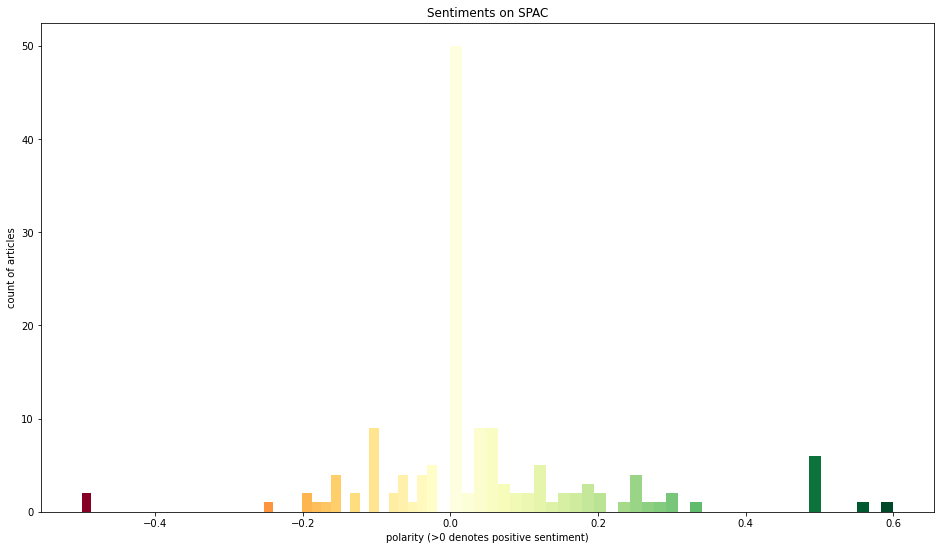

In [23]:
# Returns since Inception
data = sentiment_df['polarity']
left_data = [i for i in data if i < 0]
right_data = [i for i in data if i >= 0]

def hist2(x, vmin, vmax, cmmap_name, ax=None,):

    cm = plt.cm.get_cmap(cmmap_name)
    ax = ax or plt.gca()
    _, bins, patches = ax.hist(x,color="r",bins=int(len(data)/4))

    bin_centers = 0.5*(bins[:-1]+bins[1:])
    norm = plt.Normalize(vmin, vmax)

    for c, p in zip(bin_centers, patches):
        plt.setp(p, "facecolor", cm(norm(c)))

fig, ax = plt.subplots(figsize=(16, 9))
hist2(left_data, min(left_data), max(left_data), "YlOrRd_r", ax=ax)
hist2(right_data, min(right_data), max(right_data), "YlGn", ax=ax)

plt.xlabel('polarity (>0 denotes positive sentiment)')
plt.ylabel('count of articles')
plt.title("Sentiments on SPAC")
plt.show()